In [67]:
import pandas as pd
import numpy as np
import os
import random
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, Normalizer, StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
import benchmarks

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator, DataGenerator

import transform_functions
# from .benchmarks import bench_k_means, bench_k_medoids
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# plt.figure(figsize=(15, 12))

In [69]:
data_kpis = pd.read_csv("data/kpis.csv")
drop_ent = []
drop_ind = []
''''loans_cap_assets', 'loans_cap_to_banks_assets', 'titles_assets', 'deriv_assets', 
            'dep_cap_assets', 'loan_avg_segment_asset', 'net_worth_assets', 'net_int_inc_tot_income',
            'serv_rev_tot_inc', "asset_total_asset"]'''
data_kpis = data_kpis[~data_kpis["ind"].isin(drop_ind)]
display(data_kpis.ind.unique())
# display(data_kpis.head())

array(['serv_rev_tot_inc', 'titles_assets', 'dep_cap_assets',
       'implied_liable_rate', 'implied_lending_rate', 'implied_spread',
       'liquidity_ratio', 'pers_cred_card_loans',
       'adv_curr_acc_disc_doc_loans', 'roe', 'net_worth_assets',
       'loans_cap_assets', 'loans_cap_to_banks_assets', 'deriv_assets',
       'net_int_inc_tot_income', 'exp_dep_cap_loans', 'asset_tot_asset',
       'loan_avg_segment_asset'], dtype=object)

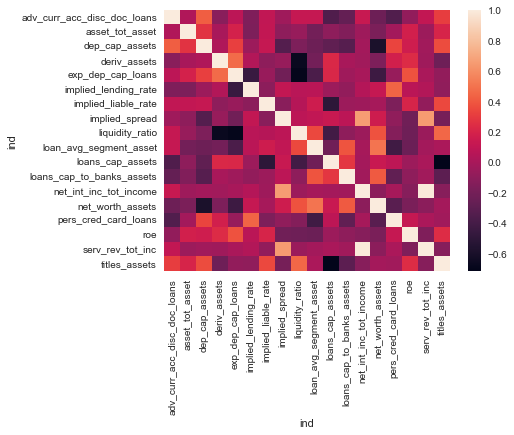

In [70]:
data = transform_functions.get_mean_pivot_table(data_kpis, 0, 2, 1, 3, 2015, 2015)
df_corr, data = benchmarks.find_and_drop_correlated_features(data, labels_col="ent", threshold=0.7, drop=True, plot=True)
# display([c for c in data.columns if c not in df.columns])
# display(df_corr)
# display(df)

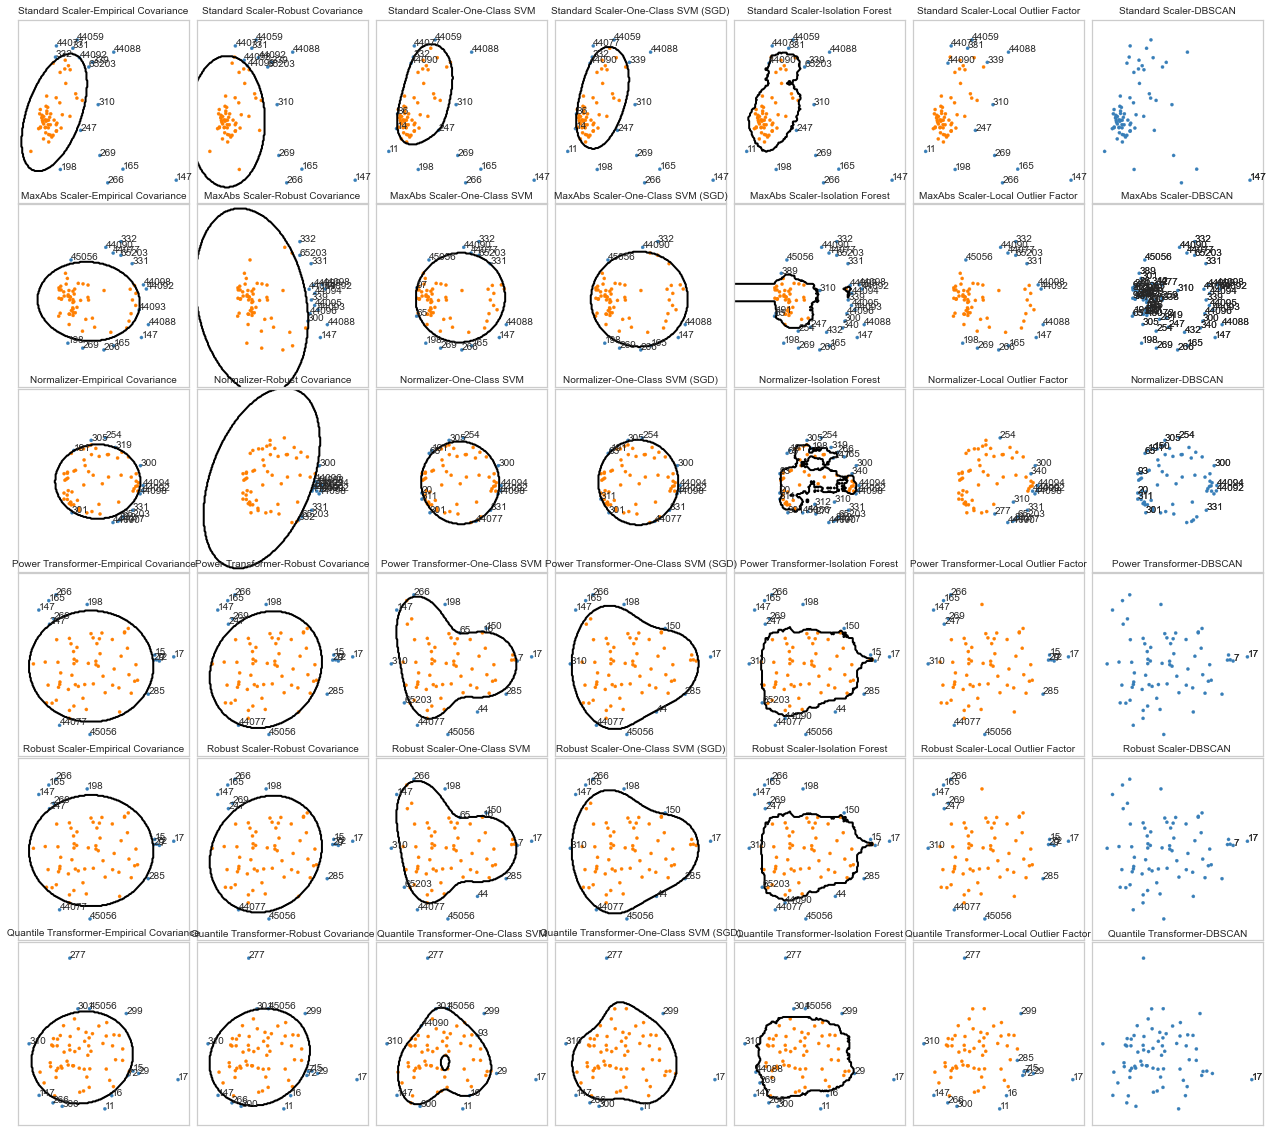

<Figure size 460.8x345.6 with 0 Axes>

In [71]:
# data = transform_functions.get_mean_pivot_table(data_kpis, 0, 2, 1, 3, 2015, 2015)
test_scaling_and_anomaly = benchmarks.benchmark_scaling_and_oultlier_methods(data=data, labels_col="ent", plot=True)

In [72]:
df = benchmarks.drop_outliers(data=data, labels_col="ent", scaler=2, algorithm=6)
# display(df.head(20))
# print(df.shape)

MaxAbsScaler() Local Outlier Factor


In [73]:
# df = data
(n_sample, n_features), n_digits = df.shape, 5
print(f"digits: {n_digits}, samples: {n_sample}, features: {n_features}")

digits: 5, samples: 57, features: 17


,method,k,inertia,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score,davies_bouldin_score,calinski_harabasz_score
0,kmeans(k=2)-None,2,18.113836,0.132804,1.0,0.234470,0.0,-4.749797e-15,0.412040,1.216842,28.388976
1,kmeans(k=3)-None,3,14.590054,0.251583,1.0,0.402024,0.0,-6.017296e-15,0.256310,1.295179,23.823346
2,kmeans(k=4)-None,4,12.585307,0.286950,1.0,0.445938,0.0,6.161704e-16,0.263292,1.329308,20.885356
3,kmeans(k=5)-None,5,11.319172,0.339721,1.0,0.507152,0.0,-3.759604e-14,0.223405,1.244857,18.541697
4,kmeans(k=6)-None,6,10.158259,0.397676,1.0,0.569053,0.0,-4.504307e-14,0.183007,1.385040,17.376382
5,kmeans(k=7)-None,7,9.298963,0.395714,1.0,0.567041,0.0,-4.598738e-14,0.223691,1.204400,16.278309
6,kmeans(k=8)-None,8,8.241412,0.469156,1.0,0.638674,0.0,-2.441607e-14,0.206089,1.255541,16.326671
7,kmeans(k=9)-None,9,7.577582,0.464651,1.0,0.634487,0.0,-4.370223e-14,0.212594,1.092633,15.745881
8,kmeans(k=10)-None,10,6.918692,0.504645,1.0,0.670783,0.0,-5.499161e-14,0.209519,1.160420,15.507226


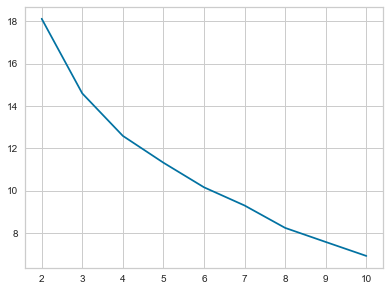

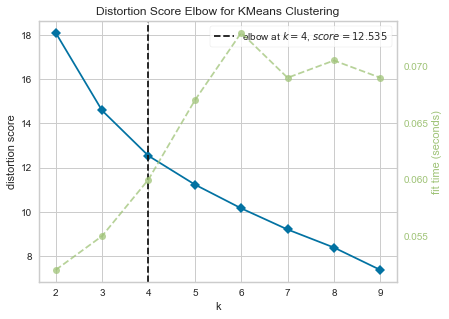

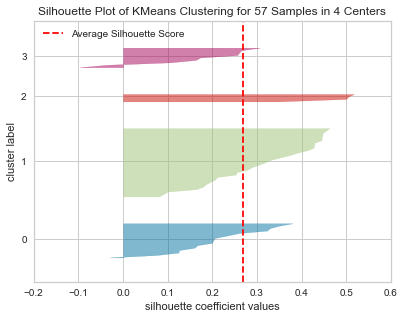

2


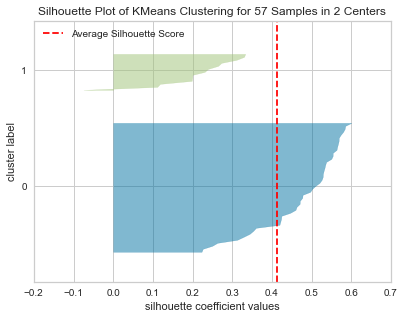

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 57 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [74]:
init_list = ["random", "k-means++"]
algorithm_list = ["lloyd", "elkan"]
params = {
    'algorithm': algorithm_list[1], 
    'copy_x': True, 
    'init': init_list[1], 
    'max_iter': 1000, 
    'n_clusters': 50, 
    'n_init': 10, 
    'random_state': None, 
    'tol': 0.0001, 
    'verbose': 0
}
df_scores = benchmarks.elbow_optimal_k(df, labels_col="ent", model="kmeans", params=params, max_k=10)
display(df_scores)

plt.plot(df_scores["k"], df_scores["inertia"])
# plt.plot(df_scores["k"], df_scores["inertia"])
plt.show()
plt.clf()

'''# Fit PCA with 2 components
pca = PCA(n_components=2).fit_transform(df.iloc[:,1:].to_numpy())
# Visualize the data
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(pca[:, 0], pca[:, 1], x="PCA1", y="PCA2")'''

# Instantiate the clustering model and visualizer
model = KMeans().set_params(**params)
kelbow_model = KElbowVisualizer(model, k=(2,10))

kelbow_model.fit(df.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
kelbow_model.show()                               # Finalize and render the figure

elbow = kelbow_model.elbow_value_
params["n_clusters"] = elbow
model = KMeans().set_params(**params)
silhouette_model = SilhouetteVisualizer(model, colors='yellowbrick')
silhouette_model.fit(df.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
silhouette_model.show()                               # Finalize and render the figure

silhouette_k = df_scores["k"].iloc[df_scores["silhouette_score"].idxmax()]
print(silhouette_k)
params["n_clusters"] = silhouette_k
model = KMeans().set_params(**params)
silhouette_model = SilhouetteVisualizer(model, colors='yellowbrick')
silhouette_model.fit(df.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
silhouette_model.show()                               # Finalize and render the figure

,method,k,inertia,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score,davies_bouldin_score,calinski_harabasz_score
0,kmedoids(k=2)-None,2,32.015862,0.132804,1.0,0.234470,0.0,-4.749797e-15,0.412040,1.216842,28.388976
1,kmedoids(k=3)-None,3,28.823838,0.261972,1.0,0.415178,0.0,4.018386e-15,0.226730,1.360747,22.760542
2,kmedoids(k=4)-None,4,26.413328,0.296790,1.0,0.457731,0.0,-2.499172e-15,0.241630,1.299433,20.595441
3,kmedoids(k=5)-None,5,24.819097,0.371615,1.0,0.541865,0.0,-2.394726e-14,0.185824,1.526817,17.947818
4,kmedoids(k=6)-None,6,23.600191,0.410549,1.0,0.582112,0.0,-3.503249e-14,0.189290,1.380221,16.378697
5,kmedoids(k=7)-None,7,22.591097,0.430070,1.0,0.601467,0.0,-3.719604e-14,0.192732,1.312810,15.609628
6,kmedoids(k=8)-None,8,21.592284,0.461257,1.0,0.631316,0.0,-4.077646e-14,0.207704,1.214588,15.506527
7,kmedoids(k=9)-None,9,20.660496,0.463272,1.0,0.633200,0.0,-2.558094e-14,0.218854,1.072679,15.650159
8,kmedoids(k=10)-None,10,19.825599,0.508760,1.0,0.674408,0.0,-5.947700e-14,0.186708,1.180926,14.732585


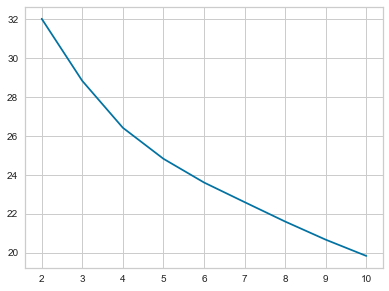

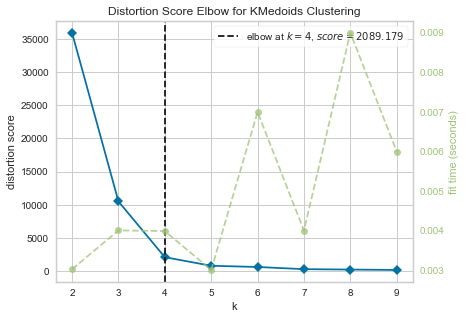

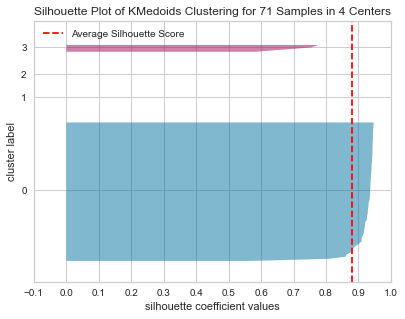

2


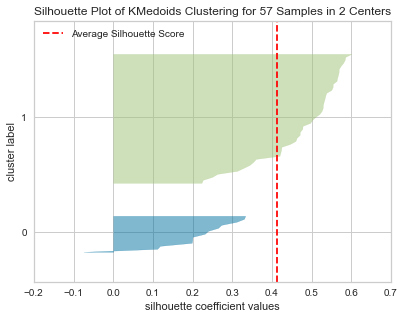

<AxesSubplot:title={'center':'Silhouette Plot of KMedoids Clustering for 57 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
init_list = ["random", "heuristic", "k-medoids++", "build"]
method_list = ["alternate", "pam"]
params = {
    'init': init_list[2],
    'max_iter': 1000,
    'method': method_list[1],
    'metric': 'euclidean',
    'n_clusters': 8,
    'random_state': None
 }
df_scores = benchmarks.elbow_optimal_k(df, labels_col="ent", model="kmedoids", params=params, max_k=10)
display(df_scores)

plt.plot(df_scores["k"], df_scores["inertia"])
# plt.plot(df_scores["k"], df_scores["inertia"])
plt.show()
plt.clf()

'''# Fit PCA with 2 components
pca = PCA(n_components=2).fit_transform(df.iloc[:,1:].to_numpy())
# Visualize the data
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(pca[:, 0], pca[:, 1], x="PCA1", y="PCA2")'''

# Instantiate the clustering model and visualizer
model = KMedoids().set_params(**params)
kelbow_model = KElbowVisualizer(model, k=(2,10))

kelbow_model.fit(data.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
kelbow_model.show()                               # Finalize and render the figure

elbow = kelbow_model.elbow_value_
params["n_clusters"] = elbow
model = KMedoids().set_params(**params)
silhouette_model = SilhouetteVisualizer(model, colors='yellowbrick')

silhouette_model.fit(data.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
silhouette_model.show()       

silhouette_k = df_scores["k"].iloc[df_scores["silhouette_score"].idxmax()]
print(silhouette_k)
params["n_clusters"] = silhouette_k
model = KMedoids().set_params(**params)
silhouette_model = SilhouetteVisualizer(model, colors='yellowbrick')
silhouette_model.fit(df.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
silhouette_model.show()                               # Finalize and render the figure

,method,k,inertia,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score,davies_bouldin_score,calinski_harabasz_score
0,minibatch_kmeans(k=2)-None,2,18.150297,0.127293,1.0,0.225839,0.0,-1.094994e-14,0.414259,1.165549,28.297842
1,minibatch_kmeans(k=3)-None,3,14.706572,0.251583,1.0,0.402024,0.0,-6.017296e-15,0.256310,1.295179,23.823346
2,minibatch_kmeans(k=4)-None,4,14.688118,0.192481,1.0,0.322824,0.0,-1.781884e-14,0.385167,1.156753,15.451268
3,minibatch_kmeans(k=5)-None,5,12.106435,0.357737,1.0,0.526960,0.0,-1.470775e-14,0.176214,1.534218,16.631966
4,minibatch_kmeans(k=6)-None,6,10.725045,0.336806,1.0,0.503897,0.0,-2.848716e-14,0.253034,1.045701,16.034820
5,minibatch_kmeans(k=7)-None,7,9.981034,0.410441,1.0,0.582003,0.0,-3.707546e-14,0.195488,1.353108,14.647723
6,minibatch_kmeans(k=8)-None,8,10.225090,0.454268,1.0,0.624738,0.0,-4.890894e-14,0.118183,1.419760,12.060534
7,minibatch_kmeans(k=9)-None,9,8.035068,0.496734,1.0,0.663757,0.0,-6.460333e-14,0.196357,1.265243,14.713579
8,minibatch_kmeans(k=10)-None,10,7.865901,0.487413,1.0,0.655383,0.0,-5.871425e-14,0.176396,1.150150,13.150661


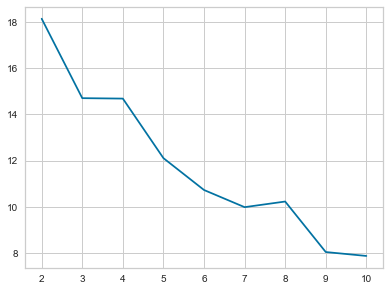

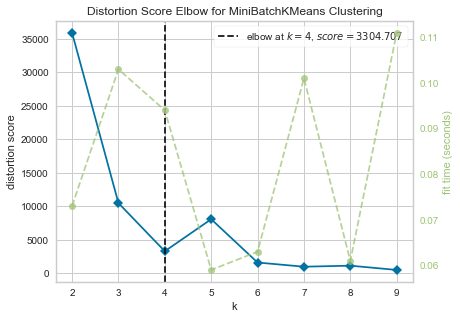

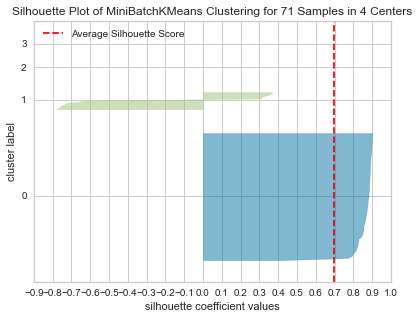

2


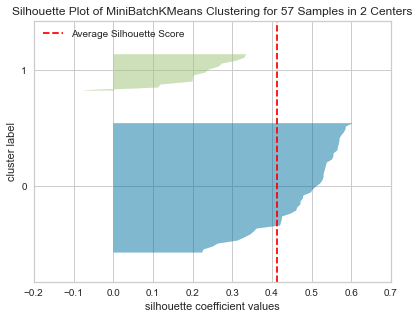

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 57 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
init_list = ["random", "k-means++"]
algorithm_list = ["lloyd", "elkan"]
params = {
    'batch_size': 1024,
    'compute_labels': True,
    'init': init_list[0],
    'init_size': None,
    'max_iter': 1000,
    'max_no_improvement': 10,
    'n_clusters': 8,
    'n_init': 10,
    'random_state': None,
    'reassignment_ratio': 0.01,
    'tol': 0.0,
    'verbose': 0
}
df_scores = benchmarks.elbow_optimal_k(df, labels_col="ent", model="minibatch_kmeans", params=params, max_k=10)
display(df_scores)

plt.plot(df_scores["k"], df_scores["inertia"])
# plt.plot(df_scores["k"], df_scores["inertia"])
plt.show()
plt.clf()

'''# Fit PCA with 2 components
pca = PCA(n_components=2).fit_transform(df.iloc[:,1:].to_numpy())
# Visualize the data
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(pca[:, 0], pca[:, 1], x="PCA1", y="PCA2")'''

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans().set_params(**params)
kelbow_model = KElbowVisualizer(model, k=(2,10))

kelbow_model.fit(data.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
kelbow_model.show()                               # Finalize and render the figure

elbow = kelbow_model.elbow_value_
params["n_clusters"] = elbow
model = MiniBatchKMeans().set_params(**params)
silhouette_model = SilhouetteVisualizer(model, colors='yellowbrick')

silhouette_model.fit(data.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
silhouette_model.show() 

silhouette_k = df_scores["k"].iloc[df_scores["silhouette_score"].idxmax()]
print(silhouette_k)
params["n_clusters"] = silhouette_k
model = MiniBatchKMeans().set_params(**params)
silhouette_model = SilhouetteVisualizer(model, colors='yellowbrick')
silhouette_model.fit(df.iloc[:,1:].to_numpy())        # Fit the data to the visualizer
silhouette_model.show() 